In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lets build a multiple linear regression model with numeric features only.

In [2]:
housing_data = pd.read_csv('../data/housing_price.csv')

In [3]:
# 80% of housing_data.shape[0] = 1168
max_index = housing_data.shape[0] - 1
numbers = max_index*80//100
train_indexs = np.linspace(start=0, stop=max_index, num=numbers, dtype=int)
test_indexs = [x for x in range(max_index) if x not in train_indexs]
housing_train_set = housing_data.loc[train_indexs]
housing_test_set = housing_data.loc[test_indexs]

In [4]:
housing_train_set.fillna(value=housing_train_set.mean()[['LotFrontage']], inplace=True)
housing_train_set['MasVnrArea'].fillna(value=0, inplace=True)
housing_train_set['GarageYrBlt'].interpolate(method='nearest', inplace=True)

In [5]:
housing_train_set.rename(columns={'1stFlrSF':'FstFlrSF', '2ndFlrSF':'SecndFlrSF', '3SsnPorch':'ThreeSsnPorch'}, inplace=True)

In [6]:
np.unique(housing_train_set.dtypes.values)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [7]:
def getNumericalNonNullFeatureNames(df):
    ser_dtypes = df.dtypes
    #Feature names which have numeric data and have no nulls.
    num_col_names = [x for x in ser_dtypes.index 
                       if ser_dtypes[x] in ['int64','float64']
                                        and df[x].shape[0] == len(df)]
    return num_col_names

In [8]:
numerical_features = getNumericalNonNullFeatureNames(housing_train_set)
print('Numerical features : ', numerical_features)

Numerical features :  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'FstFlrSF', 'SecndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThreeSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [8]:
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(housing_data, test_size = 0.25, random_state=0)
#print('Data type of X_train - {0}, lenght of X_train - {1}'.format(type(X_train), len(X_train)))
#print('Data type of X_test - {0}, lenght of X_test - {1}'.format(type(X_test), len(X_test)))

In [9]:
numerical_features.remove('SalePrice')

In [10]:
# Create input variable string for formula interface
formula_input_features = '+'.join(numerical_features)
print(formula_input_features)

Id+MSSubClass+LotFrontage+LotArea+OverallQual+OverallCond+YearBuilt+YearRemodAdd+MasVnrArea+BsmtFinSF1+BsmtFinSF2+BsmtUnfSF+TotalBsmtSF+FstFlrSF+SecndFlrSF+LowQualFinSF+GrLivArea+BsmtFullBath+BsmtHalfBath+FullBath+HalfBath+BedroomAbvGr+KitchenAbvGr+TotRmsAbvGrd+Fireplaces+GarageYrBlt+GarageCars+GarageArea+WoodDeckSF+OpenPorchSF+EnclosedPorch+ThreeSsnPorch+ScreenPorch+PoolArea+MiscVal+MoSold+YrSold


In [11]:
import statsmodels.formula.api as smf

In [12]:
multi_reg_model = smf.ols(formula='SalePrice ~ ' + formula_input_features, data=housing_train_set).fit()

In [13]:
multi_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     137.1
Date:                Fri, 22 Sep 2017   Prob (F-statistic):               0.00
Time:                        08:08:30   Log-Likelihood:                -13892.
No. Observations:                1167   AIC:                         2.786e+04
Df Residuals:                    1131   BIC:                         2.804e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.194e+05   1.67e+06      0.072      0.943   -3.15e+06    3.39e+06
Id               -0.2900      2.559     -0.113      0.910      -5.311       4.731
MSSubClass     -198.2373     32.576     -6.085      0.000    -262.154    -134.321
LotFrontage     -99.8821     58.333     -1.712      0.087    -214.335      14.571
LotArea           0.3194      0.132      2.426      0.015       0.061       0.578
OverallQual    1.827e+04   1413.347     12.926      0.000    1.55e+04     2.1e+04
OverallCond    4402.2511   1232.134      3.573      0.000    1984.725    6819.777
YearBuilt       226.2522     78.410      2.885      0.004      72.406     380.099
YearRemodAdd    158.4840     79.280      1.999      0.046       2.932     314.036
MasVnrArea       36.4439      6.743      5.405      0.000      23.214      49.673
BsmtFinSF1        8.2768      2.961      2.796      0.005       2.468      14.086
BsmtFinSF2        0.6902      5.365      0.129      0.898      -9.836      11.216
BsmtUnfSF         0.2710      2.850      0.095      0.924      -5.320       5.862
TotalBsmtSF       9.2381      3.848      2.401      0.017       1.688      16.788
FstFlrSF         16.6246      6.934      2.397      0.017       3.019      30.230
SecndFlrSF       16.0238      6.291      2.547      0.011       3.681      28.366
LowQualFinSF     -2.0878     16.335     -0.128      0.898     -34.138      29.962
GrLivArea        30.5606      6.331      4.827      0.000      18.139      42.982
BsmtFullBath   1.042e+04   3070.242      3.393      0.001    4392.517    1.64e+04
BsmtHalfBath   4464.7266   4744.616      0.941      0.347   -4844.512    1.38e+04
FullBath       5129.7303   3300.743      1.554      0.120   -1346.538    1.16e+04
HalfBath      -2056.4339   3096.486     -0.664      0.507   -8131.937    4019.069
BedroomAbvGr  -9986.4851   1977.792     -5.049      0.000   -1.39e+04   -6105.931
KitchenAbvGr  -1.431e+04   5931.387     -2.412      0.016   -2.59e+04   -2669.935
TotRmsAbvGrd   5399.5618   1429.879      3.776      0.000    2594.049    8205.075
Fireplaces     4262.8325   2090.961      2.039      0.042     160.234    8365.431
GarageYrBlt     145.8209     74.270      1.963      0.050       0.099     291.542
GarageCars     1.387e+04   3366.357      4.119      0.000    7261.981    2.05e+04
GarageArea      -14.5172     11.794     -1.231      0.219     -37.658       8.623
WoodDeckSF       29.6755      9.459      3.137      0.002      11.116      48.235
OpenPorchSF       2.4823     16.883      0.147      0.883     -30.643      35.607
EnclosedPorch    14.8126     19.991      0.741      0.459     -24.410      54.036
ThreeSsnPorch    26.8806     35.762      0.752      0.452     -43.286      97.047
ScreenPorch      53.5596     18.982      2.822      0.005      16.316      90.803
PoolArea        -31.7914     27.349     -1.162   

In [14]:
multi_reg_model.pvalues.sort_values(ascending=True)

OverallQual      9.529137e-36
MSSubClass       1.588759e-09
MasVnrArea       7.901200e-08
BedroomAbvGr     5.164759e-07
GrLivArea        1.573936e-06
GarageCars       4.077323e-05
TotRmsAbvGrd     1.674950e-04
OverallCond      3.679581e-04
BsmtFullBath     7.159274e-04
WoodDeckSF       1.749557e-03
YearBuilt        3.982308e-03
ScreenPorch      4.861382e-03
BsmtFinSF1       5.267736e-03
SecndFlrSF       1.098768e-02
LotArea          1.543784e-02
KitchenAbvGr     1.601497e-02
TotalBsmtSF      1.652776e-02
FstFlrSF         1.667407e-02
Fireplaces       4.171259e-02
YearRemodAdd     4.584243e-02
GarageYrBlt      4.984442e-02
LotFrontage      8.711932e-02
FullBath         1.204370e-01
GarageArea       2.186136e-01
PoolArea         2.453018e-01
BsmtHalfBath     3.469012e-01
ThreeSsnPorch    4.524128e-01
EnclosedPorch    4.588632e-01
YrSold           4.619726e-01
HalfBath         5.067498e-01
MoSold           6.325845e-01
MiscVal          8.716041e-01
OpenPorchSF      8.831356e-01
BsmtFinSF2

# Variable/Feature Selection
   * Let us take an example of two PREDICTORS and a TARGET variables. In this scenario we can build models with below combinations and verify accuracy metrics and decide the best featrue.
   
        1) A model with no variables (only intercept)
        
        2) A model with x1 only
        
        3) A model with x2 only
        
        4) A model wiht x1, x2 both (this may contain interaction (a0 + a1*x1 + a2*x2 + a3*x1*x2, interaction term - x1*x2) term also.
                
   * To determine best model out of the above four we can use various evaluation metrics such as Adjusted - R2
   
Note : <font color='red'> Unfortunatly there are a total of 2 ^ m models that contain subset of m variables. If m is large, there should be an automated way to choose a smaller set of models to consder.</font>       

## Feature Selection - Backword Selection
    * We start with all variables n the model, remove the variables with largest p-value (least significant). We continue this process until we find all variables p-value <= 0.05 (5% threshold).

In [15]:
def buildModel(df, numerical_features):
    formula_input_features = '+'.join(numerical_features)
    multi_reg_model = smf.ols(formula='SalePrice ~ ' + formula_input_features, data=housing_train_set).fit()
    return multi_reg_model

def backWordSelection(df, numerical_features):
    for i in range(len(numerical_features[:])):
        multi_reg_model = buildModel(df, numerical_features)
        sorted_pvalues = multi_reg_model.pvalues.sort_values(ascending=False)
        sorted_pvalues.drop('Intercept', inplace=True)
        if(sorted_pvalues[0] > 0.05):
            drop_feature = sorted_pvalues.index.values[0]
            sorted_pvalues.drop(drop_feature, inplace=True)
            numerical_features = sorted_pvalues.index.values
        else:
            break
    return numerical_features, multi_reg_model
    

In [16]:
numerical_features, multi_reg_model = backWordSelection(housing_train_set, numerical_features)
print(numerical_features)
print(multi_reg_model.summary())

['LotFrontage' 'FullBath' 'YearRemodAdd' 'Fireplaces' 'BsmtFinSF1'
 'KitchenAbvGr' 'LotArea' 'ScreenPorch' 'TotalBsmtSF' 'YearBuilt'
 'WoodDeckSF' 'BsmtFullBath' 'OverallCond' 'TotRmsAbvGrd' 'BedroomAbvGr'
 'GarageCars' 'MasVnrArea' 'MSSubClass' 'GrLivArea' 'OverallQual']
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     240.7
Date:                Fri, 22 Sep 2017   Prob (F-statistic):               0.00
Time:                        08:24:50   Log-Likelihood:                -13897.
No. Observations:                1167   AIC:                         2.784e+04
Df Residuals:                    1146   BIC:                         2.794e+04
Df Model:                          20                                         
Covariance Type:

# Forward Selection
We begin with a null model, we then fit m (m featrues) simple linear regressions. Choose the variable which results in lease RSS. Add this variable to null model. We then add the model the variable that results in the lowest RSS for the new two variable model. This approach is continued until some stopping rule is satisified.

# Mixied Selection
This is a combination of forward and backword selection. We start with no variable, and as we forward selection, we add the varaible that provides the best fit. We continue to add variables one-by-one. The p-value for variables can become larger as new predictros are added to the model. 
    
   Hence if at any point the p-value for one of the variables in the model raises above certain threshold, then we remove the variable from the model. We continue to perform these forward and backword steps until all variables in the model have a sufficiently low p-value.
    
<font color='red'>

1) Backword selection cannot be useful if m>n (number of features is greater than number of samples.

2) Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this drawback with forward selection.

</font>

# Outliers - Leverage Points - Influence
Before we move forward lets understand few things

**Outliers : ** In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

**Leverage Point :** An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

$$h_i=\frac{1}{n} + \frac{(x_i - \vec{x})^2}{\sum_{i=1}^n (x_i -\vec{x})^2}$$

   - $h_i$ increases with the distance from $x_i$ from $\vec{x}$
   - The leverage statistic $h_i$ is always between $\frac{1}{n}$ and 1
   - The average leverage of all observations is equal to $\frac{(p+1)}{n}$
   - **High Leverage point :** If $x_i$'s leverage value greatly exceeds $\frac{(p+1)}{n}$, then we **may suspect** that the point has High Leverage.  

**Influence:** An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlieres.

**Cook's distance:** is a commonly used estimate of the **influence** of a data point when performing a **ordinary least squares analysis**. Cook's distance is useful to indicate **influential data points** that are particularly **worth checking for validity**.
   - **Cook's D Definition **- Data points with large residuals (outliers) and/or high leverage may distort the outcome and accuracy of a regression. Cook's distance measures the effect of deleting a given observation. Points with a large Cook's distance are considered to merit closer examination in the analysis

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


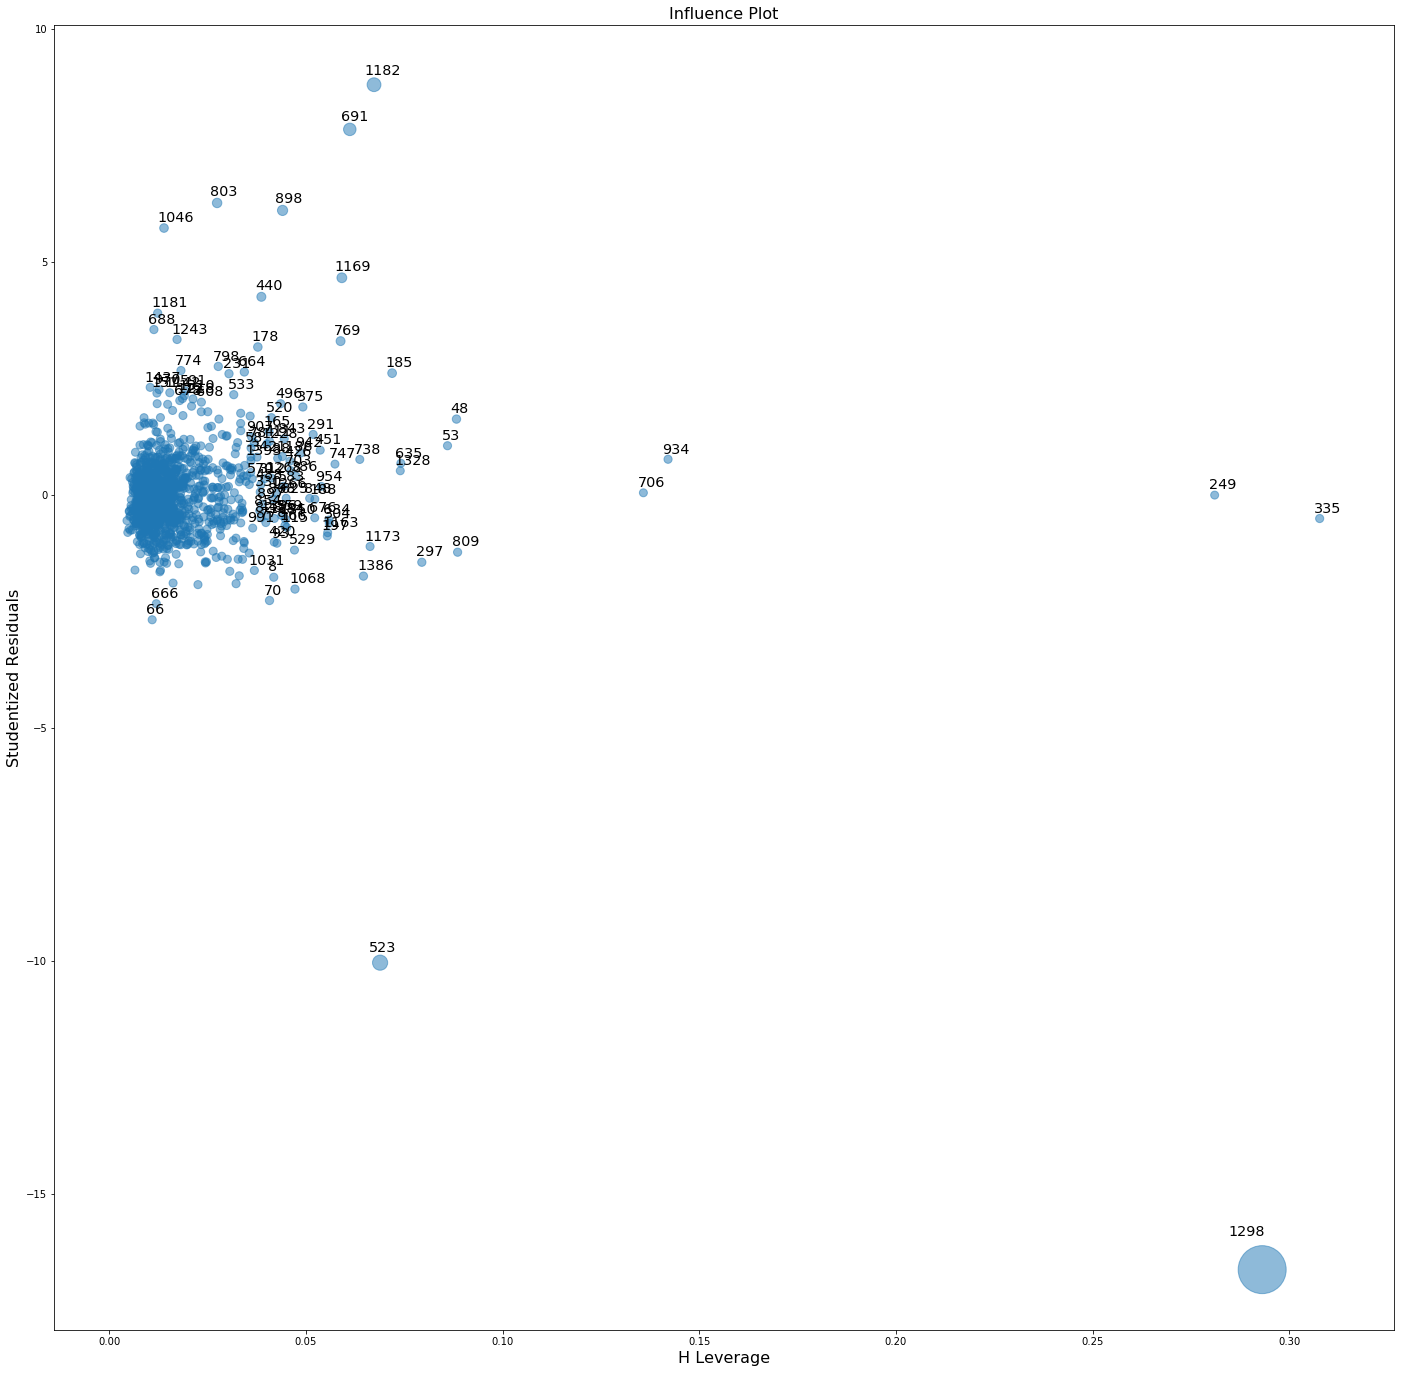

In [23]:
#reference - http://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/
#criterion : ‘Cooks’ - Which criterion to base the size of the points on (bubble size)
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *

fig, ax = plt.subplots(figsize=(24,24))
fig = sm.graphics.influence_plot(multi_reg_model, ax = ax, criterion="cooks", plot_alpha=0.5)
plt.show()

# Linear Regression Assumptions:

Most statistical tests rely upon certain assumptions about the variables used in the analysis. When these assumptions
are not met the results may not be trust worthy. Here we will discuss the assumptions of linearity,reliability of measurement, homoscedasticity, and normality. (reference http://people.duke.edu/~rnau/testing.htm, http://www.ics.uci.edu/~jutts/110/Lecture3.pdf)

**1) Linearity** 
   - This assumption implies that there should be linear relationship between the response variables and the predictors. if you fit a linear model to data which are nonlinearly or nonadditively related, your predictions are likely to be seriously in error, especially when you extrapolate beyond the range of the sample data. 
    
**How to diagnose:** nonlinearity is usually most evident in a plot of **observed versus predicted values** or a plot of **residuals versus predicted values**. (The residual-versus-predicted-plot is better, because it eliminates the visual distraction of a sloping pattern). In multiple regression models, nonlinearity or nonadditivity may also be revealed by systematic patterns in plots of the residuals versus individual independent variables (will show below)

**observed versus predicted values : ** For a linearly related indipendent and dependent variables, The points should be symmetrically distributed around a diagonal line.

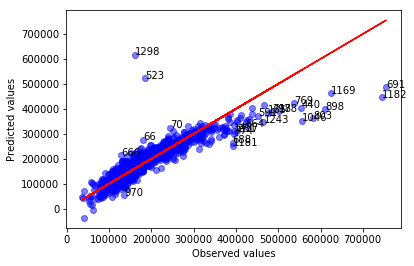

In [22]:
observed = housing_train_set['SalePrice']
predicted = multi_reg_model.predict(housing_train_set)
residuals = observed- predicted
plt.scatter(observed, predicted, alpha = 0.5, color='blue')
for i in range(len(observed)):
    idx = observed.index[i]
    if(np.abs(residuals[idx]) > 80000):
        plt.text(observed[idx], predicted[idx], s=str(idx))
        
plt.plot(observed, observed, color='red')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.show()

**residuals versus predicted values** If we speak as a layman, the errors (or residuals) should be close to zero (negitive or positive) for any predicted value. That said the dots should be close to horizantal line. 

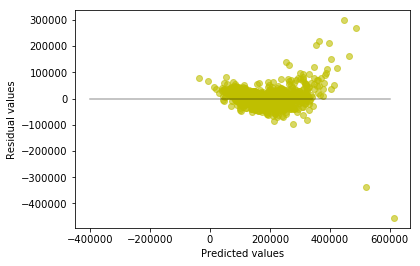

In [23]:
plt.scatter(predicted, residuals, alpha = 0.6, color='y')
plt.plot([-400000,600000],[0, 0], color='k', alpha=0.3)
plt.xlabel('Predicted values')
plt.ylabel('Residual values')
plt.show()

**statndardized residuals vs predicted values**

In [20]:
#from scipy import stats
#stats.zscore(residuals)

def standard_scale(res):
    mean_residuals = np.mean(res)
    std_residuals = np.std(res)
    std_res = [(x - mean_residuals)/std_residuals for x in res]
    return std_res

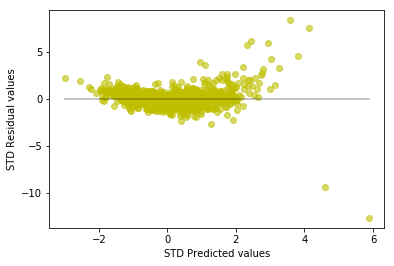

In [24]:
std_residuals = standard_scale(residuals)
std_predicted = standard_scale(predicted)

plt.scatter(std_predicted, std_residuals, alpha = 0.6, color='y')
plt.plot([min(std_predicted),max(std_predicted)],[0, 0], color='k', alpha=0.3)
plt.xlabel('STD Predicted values')
plt.ylabel('STD Residual values')
plt.show()

### systematic patterns in residuals versus predicted values and meaning

<img src="residual_vs_fitted_pattern.png">

**How to Fix:** To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable.

**2) Heteroskedasticity**
   - The presence of non-constant variance in the error terms results in heteroskedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values. Look like, these values get too much weight, thereby disproportionately influences the model’s performance. When this phenomenon occurs, the confidence interval for out of sample prediction tends to be unrealistically wide or narrow.

**How to check:** You can look at residual vs predicted (or fitted) values plot. If heteroskedasticity exists, the plot would exhibit a funnel shape pattern (example shown below). Also, you can use Breusch-Pagan / Cook – Weisberg test or White general test to detect this phenomenon.

### systematic patterns in residuals versus predicted values and meaning

<img src="heteroskedasticity.png">

**How to Fix:** To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

**3) Normal Distribution of error terms**

   - Calculation of confidence intervals and various significance tests for coefficients are all based on the assumptions of normally distributed errors. If the error distribution is significantly non-normal, confidence intervals may be too wide or too narrow.
   - Also, a significant violation of the normal distribution assumption is often a <font color='red'>red flag </font> indicating that there is some other problem with the model assumptions and/or that there are a few unusual data points (may be outliers or leverage points) that should be studied closely and/or that a better model is still waiting out there somewhere.
   
**How to check:** You can look at QQ plot (shown below). 

   - If the distribution is normal, the points on QQ plot should "fall close to the diagonal reference line".
    
   - A "bow-shaped pattern" of deviations from the diagonal indicates that the residuals have excessive skewness (i.e., they are not symmetrically distributed, with too many large errors in one direction). 
    
   - An "S-shaped pattern" of deviations indicates that the residuals have excessive kurtosis (i.e., there are either too many or two few large errors in both directions.)  
    
   - Sometimes the problem is revealed to be that there are a few data points on one or both ends that deviate significantly from the reference line ("outliers"), in which case they should get close attention. 
    
   - Different statistical test:  Kolmogorov-Smirnov test, the Shapiro-Wilk test, the Jarque-Bera test, and the Anderson-Darling test.

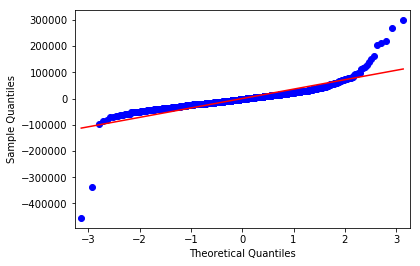

In [40]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

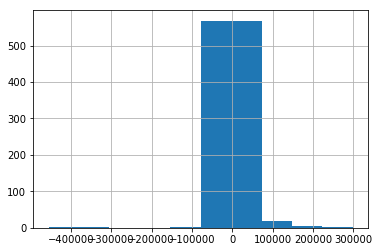

In [23]:
residuals.hist()
plt.show()

**How to fix:** Violations of normality often arise either because 
   
   (a) The distributions of the dependent and/or independent variables are themselves significantly non-normal, and/or 
    
   (b) The linearity assumption is violated. In such cases, a nonlinear transformation of variables might cure both problems.

* **Note:** The dependent and independent variables in a regression model do not need to be normally distributed by themselves only the prediction errors need to be normally distributed. 
    

**4) Serial correlation or Auto correlatioin** 
   - Potentially very serious in time series regression models. The correlation between consecutive errors or errors separated by some other number of periods is known as "Serial correlation". Serial correlation is sometimes a by product of a violation of the linearity assumption.
   
**How to Check:** Look for Durbin – Watson (DW) statistic. It must lie between 0 and 4. If DW = 2, implies no autocorrelation, 0 < DW < 2 implies positive autocorrelation while 2 < DW < 4 indicates negative autocorrelation. Also, you can see residual vs time plot and look for the seasonal or correlated pattern in residual values.

**How to Fix:**  Serial correlation could be due to a violation of the linearity assumption or due to bias that is explainable by omitted variables (say, interaction terms).

**5) Multicollinearity**
   
   - **Collinearity - ** Collinearity refers to the situation in which **two or more predictor** variables are closely related to one another. This will create problems in finding out individual predictor's effect on the restonse variable. 
   
   - **Multicollinearity - ** Collinearity can be detected by using correlation matrix. The collinearity may exist between three or more predictors even if no pair of predictors has a particularly high correlation. This situation is called Multicollinearity.

**How to check:** You can use heatmap/scatter plot to visualize correlation effect among variables. Also, we can use VIF (Variance Inflation Factor). VIF value <= 4 suggests no multicollinearity whereas a value of >= 10 implies serious multicollinearity. Above all, a correlation table should also solve the purpose.

**How to fix:** We can deal with this issue using regularization concept, which will be delt in coming sessions.

# Model validation on Test Set

In [18]:
#housing_test_set.rename(columns={'1stFlrSF':'FstFlrSF', '2ndFlrSF':'SecndFlrSF', '3SsnPorch':'ThreeSsnPorch'}, inplace=True)
test_predicts = multi_reg_model.predict(housing_test_set)
#print(test_predicts)
print(housing_test_set['SalePrice'] - test_predicts)

4       -43301.791462
9        33958.781146
14                NaN
19       15028.152505
24                NaN
29        9217.660971
34        4681.611728
39       28150.878236
44       17572.835599
49        1843.078286
54       15419.220944
59       11675.774005
64                NaN
69        8134.342197
74       30473.964905
79       -4063.380126
84                NaN
89       26916.282441
94        5391.000816
99       24451.504190
104               NaN
109     -34302.214552
114      24831.411035
119     -18819.419600
124     -18780.197202
129      14194.449515
134      -1474.494913
139      19899.577058
144     -30463.316773
149               NaN
            ...      
1314     22943.557930
1319     31940.845328
1324   -137715.989960
1329    -31558.656767
1334     -7501.962746
1339     29821.768076
1344    -44128.956149
1349    -62948.525852
1354              NaN
1359     -2076.923172
1364    -11018.994405
1369    -35184.701762
1374      4580.839748
1379     20116.632722
1384    -2

## Conclusions from Regression Analysis: 
   - We found that the data is not linearly related with the targed data
   
   - We found that non-linear transformation on predictors might fit data, inturn will improve score of performance metric (Adjusted - $R^2$)
   
   - We found that some of the linear regression assumtion were violated by the dataset, hence the p-value and other statistics are unreliable. The feature selection we did using Backward selection is also not the best one as p-value is unreliable.

   - \* This leads us to look for more more sophisticated approaces in Machine Learning. The Scikit-Learn provides many such tools to Featrue Transformation, Resampling Techniques (for bias-vs-varience tread-off), Gradient Descent, Regularization Techniques (for automatic feature selection, handling multicolinearity - non stastical approach).

## Lets us add one categorical feature to demonstrate how OLS will handle it.
   - Feature we selected - 'MSZoning' : Identifies the general zoning classification of the sale. (we selected this with a purpose, will explain later)

In [ ]:
housing_train_set.MSZoning.shape # no nulls

In [26]:
housing_train_set.MSZoning.value_counts()

RL         916
RM         176
FV          57
RH          11
C (all)      7
Name: MSZoning, dtype: int64

In [ ]:
housing_train_set[housing_train_set['MSZoning'].isin(["C (all)" ])]['MSZoning']

In [28]:
formula_input_features1 = formula_input_features + '+' + 'MSZoning'

In [29]:
multi_reg_model1 = smf.ols(formula='SalePrice ~ ' + formula_input_features1, data=housing_train_set).fit()

In [30]:
multi_reg_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     123.4
Date:                Sat, 26 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:00:44   Log-Likelihood:                -13889.
No. Observations:                1167   AIC:                         2.786e+04
Df Residuals:                    1127   BIC:                         2.806e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.395e+05   1.67e+06      0.083      0.934   -3.14e+06    3.42e+06
MSZoning[T.FV]  1.741e+04   1.53e+04      1.139      0.255   -1.26e+04    4.74e+04
MSZoning[T.RH]  1.278e+04    1.8e+04      0.709      0.479   -2.26e+04    4.81e+04
MSZoning[T.RL]  1.397e+04   1.44e+04      0.969      0.333   -1.43e+04    4.23e+04
MSZoning[T.RM]  5910.2981   1.44e+04      0.409      0.682   -2.24e+04    3.42e+04
Id                -0.4589      2.562     -0.179      0.858      -5.485       4.567
MSSubClass      -181.7735     33.734     -5.388      0.000    -247.963    -115.584
LotFrontage     -112.9281     58.973     -1.915      0.056    -228.638       2.782
LotArea            0.2928      0.132      2.214      0.027       0.033       0.552
OverallQual     1.822e+04   1421.170     12.819      0.000    1.54e+04     2.1e+04
OverallCond     4334.0332   1241.182      3.492      0.000    1898.745    6769.321
YearBuilt        178.7838     80.816      2.212      0.027      20.218     337.350
YearRemodAdd     169.0188     79.714      2.120      0.034      12.613     325.424
MasVnrArea        37.0862      6.746      5.497      0.000      23.849      50.323
BsmtFinSF1         8.5633      2.964      2.889      0.004       2.748      14.379
BsmtFinSF2         0.5225      5.362      0.097      0.922      -9.997      11.042
BsmtUnfSF          0.5300      2.852      0.186      0.853      -5.065       6.125
TotalBsmtSF        9.6158      3.849      2.498      0.013       2.064      17.168
FstFlrSF          15.8928      6.984      2.276      0.023       2.190      29.595
SecndFlrSF        16.4628      6.302      2.612      0.009       4.099      28.827
LowQualFinSF      -1.2811     16.413     -0.078      0.938     -33.485      30.922
GrLivArea         31.0745      6.356      4.889      0.000      18.604      43.545
BsmtFullBath    9953.4003   3082.474      3.229      0.001    3905.366     1.6e+04
BsmtHalfBath    3898.8125   4764.038      0.818      0.413   -5448.569    1.32e+04
FullBath        4172.0036   3326.177      1.254      0.210   -2354.192    1.07e+04
HalfBath       -3032.0678   3133.769     -0.968      0.333   -9180.745    3116.610
BedroomAbvGr    -1.04e+04   1987.954     -5.230      0.000   -1.43e+04   -6495.849
KitchenAbvGr   -1.435e+04   5960.400     -2.407      0.016    -2.6e+04   -2653.487
TotRmsAbvGrd    5412.6960   1435.393      3.771      0.000    2596.352    8229.040
Fireplaces      4025.7621   2100.828      1.916      0.056     -96.212    8147.737
GarageYrBlt      149.6279     74.285      2.014      0.044       3.876     295.380
GarageCars      1.453e+04   3387.990      4.288      0.000    7881.487    2.12e+04
GarageArea       -15.6362     11.887     -1.315      0.189     -38.960       7.688
WoodDeckSF        30.3348      9.494      3.195      0.001      11.708      48.962
OpenPorchSF 